<a href="https://colab.research.google.com/github/samuel-c-santos/DataScienceEcosystem.ipynb/blob/main/Estudo_da_distribui%C3%A7%C3%A3o_de_casos_de_mal%C3%A1ria_na_fronteira_amaz%C3%B4nica_brasileira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importando as bibliotecas necessárias
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io

In [ ]:
!pip install cartopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 48.5 MB/s eta 0:00:00


Downloading...
From: https://drive.google.com/uc?id=1NxLfG45BvygeCXrhH1u_TGQznaGahI9h
To: /content/municipios.geojson
100%|██████████| 28.7M/28.7M [00:00<00:00, 55.8MB/s]


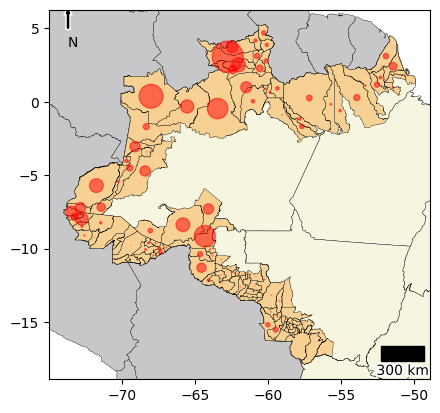

In [ ]:
# Importando as bibliotecas necessárias
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.patheffects as pe
import seaborn as sns
import gdown

# Carregando os dados geográficos
brasil = gpd.read_file('https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/Brasil/BR/BR_UF_2022.zip')
america_sul = gpd.read_file('https://geonode.paranagua.pr.gov.br/geoserver/ows?srsName=EPSG%3A4674&outputFormat=json&service=WFS&request=GetFeature&typename=geonode%3Aa__031_001_americaDoSul')

# URL do arquivo no Google Drive
url = 'https://drive.google.com/uc?id=1NxLfG45BvygeCXrhH1u_TGQznaGahI9h'
# Baixando o arquivo do drive
gdown.download(url, 'municipios.geojson', quiet=False)

# Carregando a camada adicional
municipios = gpd.read_file('municipios.geojson')

# Carregando seus dados
gdf = gpd.read_file('municipios.geojson')

# Criando a figura e os eixos
fig, ax = plt.subplots(1, 1)

# Desenhando os mapas com as cores e espessuras de linha especificadas
america_sul.plot(ax=ax, color='#c7c7c9', edgecolor='black', linewidth=0.26)
brasil.plot(ax=ax, color='#f5f5e0', edgecolor='black', linewidth=0.26)
municipios.plot(ax=ax, color='#f7d193', edgecolor='black', linewidth=0.26)

# Normalizando os valores em "Total_ivos"
gdf["casos2022_normalized"] = gdf["casos2022"] / gdf["casos2022"].max()

# Plotando o mapa de círculos proporcionais
ax.scatter(
    gdf["X_Coord"],
    gdf["Y_Coord"],
    s=gdf["casos2022_normalized"] * 500,  # Ajuste o fator de escala conforme necessário
    c='red',  # Ajuste a cor dos círculos
    alpha=0.5  # Ajuste a transparência conforme necessário
)

# Ajustando os limites do gráfico para se basear na extensão de gdf com uma margem
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx - 1, maxx + 1)
ax.set_ylim(miny - 1, maxy + 1)

# Adicionando a seta norte
arrow = plt.Arrow(0.05, 0.95, 0, 0.05, width=0.015, transform=ax.transAxes, color='black')
arrow.set_path_effects([pe.Stroke(linewidth=3, foreground='white'), pe.Normal()])
ax.add_patch(arrow)
plt.text(0.05, 0.90, 'N', transform=ax.transAxes)

# Adicionando a primeira barra de escala
scalebar1 = AnchoredSizeBar(ax.transData, 3, '300 km', 'lower right', pad=0.0, frameon=False, size_vertical=1, color='black')
scalebar1.txt_label._text.set_path_effects([pe.Stroke(linewidth=3, foreground='white'), pe.Normal()])
ax.add_artist(scalebar1)

# Mostrando o gráfico
plt.show()


Downloading...
From: https://drive.google.com/uc?id=1NxLfG45BvygeCXrhH1u_TGQznaGahI9h
To: /content/municipios.geojson
100%|██████████| 28.7M/28.7M [00:00<00:00, 150MB/s]


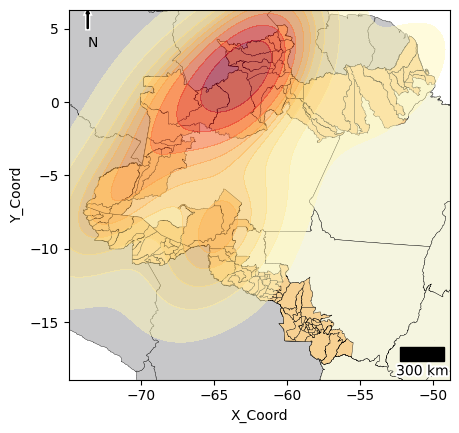

In [ ]:
# Importando as bibliotecas necessárias
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.patheffects as pe
import seaborn as sns
import gdown

# Carregando os dados geográficos
brasil = gpd.read_file('https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/Brasil/BR/BR_UF_2022.zip')
america_sul = gpd.read_file('https://geonode.paranagua.pr.gov.br/geoserver/ows?srsName=EPSG%3A4674&outputFormat=json&service=WFS&request=GetFeature&typename=geonode%3Aa__031_001_americaDoSul')

# URL do arquivo no Google Drive
url = 'https://drive.google.com/uc?id=1NxLfG45BvygeCXrhH1u_TGQznaGahI9h'
# Baixando o arquivo do drive
gdown.download(url, 'municipios.geojson', quiet=False)

# Carregando a camada adicional
municipios = gpd.read_file('municipios.geojson')

# Carregando seus dados
gdf = gpd.read_file('municipios.geojson')

# Criando a figura e os eixos
fig, ax = plt.subplots(1, 1)

# Desenhando os mapas com as cores e espessuras de linha especificadas
america_sul.plot(ax=ax, color='#c7c7c9', edgecolor='black', linewidth=0.26)
brasil.plot(ax=ax, color='#f5f5e0', edgecolor='black', linewidth=0.26)
municipios.plot(ax=ax, color='#f7d193', edgecolor='black', linewidth=0.26)

# Plotando o mapa de calor interpolado usando kdeplot
sns.kdeplot(
    ax=ax,
    data=gdf,
    x="X_Coord",
    y="Y_Coord",
    weights="casos2022",
    fill=True,
    cmap='YlOrRd',
    alpha=0.5  # Ajuste a transparência conforme necessário
)

# Ajustando os limites do gráfico para se basear na extensão de gdf com uma margem
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx - 1, maxx + 1)
ax.set_ylim(miny - 1, maxy + 1)

# Adicionando a seta norte
arrow = plt.Arrow(0.05, 0.95, 0, 0.05, width=0.015, transform=ax.transAxes, color='black')
arrow.set_path_effects([pe.Stroke(linewidth=3, foreground='white'), pe.Normal()])
ax.add_patch(arrow)
plt.text(0.05, 0.90, 'N', transform=ax.transAxes)

# Adicionando a primeira barra de escala
scalebar1 = AnchoredSizeBar(ax.transData, 3, '300 km', 'lower right', pad=0.0, frameon=False, size_vertical=1, color='black')
scalebar1.txt_label._text.set_path_effects([pe.Stroke(linewidth=3, foreground='white'), pe.Normal()])
ax.add_artist(scalebar1)

# Mostrando o gráfico
plt.show()


In [ ]:
pip install -U pysal

Downloading...
From: https://drive.google.com/uc?id=1NxLfG45BvygeCXrhH1u_TGQznaGahI9h
To: /content/municipios.geojson
100%|██████████| 28.8M/28.8M [00:00<00:00, 243MB/s]
<ipython-input-15-2e2f2e1b8cfc>:35: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = lps.weights.Rook.from_dataframe(gdf) # Matriz de pesos espaciais


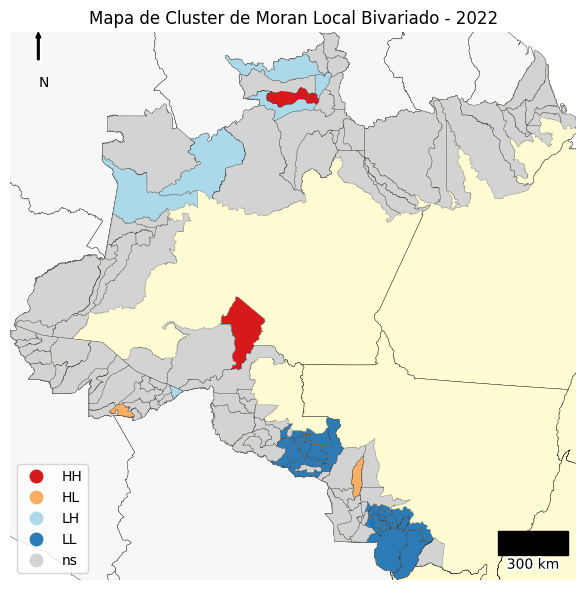

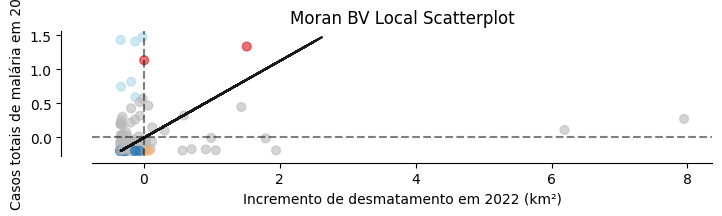

In [15]:
# Importando as bibliotecas necessárias
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.patheffects as pe
import seaborn as sns
import gdown
import pysal as ps # Importando o pysal
import libpysal as lps
from esda import Moran_Local_BV # Importando a classe Moran_Local_BV
from splot.esda import moran_scatterplot, lisa_cluster # Importando as funções de visualização espacial

# Carregando os dados geográficos
brasil = gpd.read_file('https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/Brasil/BR/BR_UF_2022.zip')
america_sul = gpd.read_file('https://geonode.paranagua.pr.gov.br/geoserver/ows?srsName=EPSG%3A4674&outputFormat=json&service=WFS&request=GetFeature&typename=geonode%3Aa__031_001_americaDoSul')

# URL do arquivo no Google Drive
url = 'https://drive.google.com/uc?id=1NxLfG45BvygeCXrhH1u_TGQznaGahI9h'
# Baixando o arquivo do drive
gdown.download(url, 'municipios.geojson', quiet=False)

# Carregando a camada adicional
municipios = gpd.read_file('municipios.geojson')

# Carregando seus dados
gdf = gpd.read_file('municipios.geojson')

# Definindo o sistema de coordenadas
gdf = gdf.set_crs(epsg=4674) # Usando o mesmo sistema de coordenadas do IBGE

# Calculando o índice local de moran bivariado
x = gdf['incremento2022'].replace(',', '.').astype(float) # Primeira variável
y = gdf['casos2022'].replace(',', '.').astype(float) # Segunda variável
w = lps.weights.Rook.from_dataframe(gdf) # Matriz de pesos espaciais
w.transform = 'r' # Transformar os pesos em row-standardized
moran_loc_bv = Moran_Local_BV(x, y, w) # Calcular o índice usando a classe importada

# Criando a figura e os eixos com um tamanho menor
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Desenhando os mapas com as cores e espessuras de linha especificadas
america_sul.plot(ax=ax, color='#f7f7f7', edgecolor='black', linewidth=0.26)
brasil.plot(ax=ax, color='#fffbd3', edgecolor='black', linewidth=0.26)

# Plotando o mapa de cluster
fig, ax = lisa_cluster(moran_loc_bv, gdf, p=0.05, ax=ax,
                       legend=True,
                       legend_kwds={'loc': 'lower left'})  # Ajustando a posição da legenda

# Desenhando os limites municipais
municipios.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.26, alpha=0.5) # Adicionando a camada de municípios com transparência e sem preenchimento

# Ajustando os limites do eixo para se basear na extensão de gdf
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx, maxx) # Definindo os limites do eixo x
ax.set_ylim(miny, maxy) # Definindo os limites do eixo y

# Adicionando um título ao mapa
ax.set_title('Mapa de Cluster de Moran Local Bivariado - 2022')

# Ajustando o layout da figura
fig.tight_layout()

# Adicionando a seta norte
arrow = plt.Arrow(0.05, 0.95, 0, 0.05, width=0.015,
                  transform=ax.transAxes,
                  color='black')
arrow.set_path_effects([pe.Stroke(linewidth=3,
                                  foreground='white'),
                        pe.Normal()])
ax.add_patch(arrow)
plt.text(0.05, 0.90,'N', transform=ax.transAxes)

# Adicionando a primeira barra de escala
scalebar1 = AnchoredSizeBar(ax.transData, 3, '300 km', 'lower right', pad=0.5, frameon=False, size_vertical=1, color='black') # Aumentando o valor de pad
scalebar1.txt_label._text.set_path_effects([pe.Stroke(linewidth=3, foreground='white'), pe.Normal()])
ax.add_artist(scalebar1) # Adicionando a barra de escala ao eixo

# Adicionando a grade de coordenadas
ax.grid(which='major', color='grey', alpha=0.5, zorder=5) # Criando uma grade com as linhas principais na cor cinza e transparência de 0.5

# Mostrando o mapa
plt.show() # Movendo essa linha para o final

# Criando um novo eixo para o gráfico de dispersão
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 6))

# Plotando o gráfico de dispersão de Moran no novo eixo
moran_scatterplot(moran_loc_bv, p=0.05, ax=ax2, aspect_equal=True)

# Personalizando as legendas dos eixos
ax2.set_xlabel('Incremento de desmatamento em 2022 (km²)')  # Substitua pelo rótulo desejado para o eixo x
ax2.set_ylabel('Casos totais de malária em 2022')  # Substitua pelo rótulo desejado para o eixo y

# Adicione outras personalizações conforme necessário, como título do gráfico, etc.

# Mostrando a figura do gráfico de dispersão
fig2.show()

Downloading...
From: https://drive.google.com/uc?id=1NxLfG45BvygeCXrhH1u_TGQznaGahI9h
To: /content/municipios.geojson
100%|██████████| 28.8M/28.8M [00:00<00:00, 104MB/s]
<ipython-input-63-79c58cb7eb41>:36: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = lps.weights.Rook.from_dataframe(gdf) # Matriz de pesos espaciais


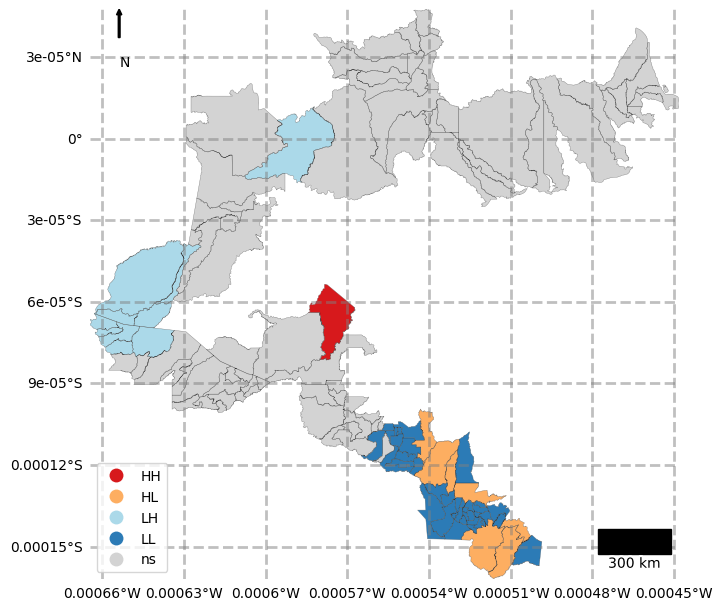

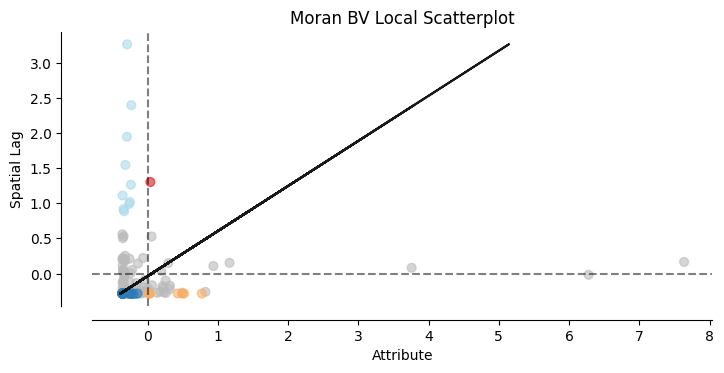

In [ ]:
# Importando as bibliotecas necessárias
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.patheffects as pe
import seaborn as sns
import gdown
import pysal as ps # Importando o pysal
import libpysal as lps
from esda import Moran_Local_BV # Importando a classe Moran_Local_BV
from splot.esda import moran_scatterplot, lisa_cluster # Importando as funções de visualização espacial
import cartopy.crs as ccrs # Importando a biblioteca cartopy

# Carregando os dados geográficos
brasil = gpd.read_file('https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/Brasil/BR/BR_UF_2022.zip')
america_sul = gpd.read_file('https://geonode.paranagua.pr.gov.br/geoserver/ows?srsName=EPSG%3A4674&outputFormat=json&service=WFS&request=GetFeature&typename=geonode%3Aa__031_001_americaDoSul')

# URL do arquivo no Google Drive
url = 'https://drive.google.com/uc?id=1NxLfG45BvygeCXrhH1u_TGQznaGahI9h'
# Baixando o arquivo do drive
gdown.download(url, 'municipios.geojson', quiet=False)

# Carregando a camada adicional
municipios = gpd.read_file('municipios.geojson')

# Carregando seus dados
gdf = gpd.read_file('municipios.geojson')

# Definindo o sistema de coordenadas
gdf = gdf.set_crs(epsg=4674) # Usando o mesmo sistema de coordenadas do IBGE

# Calculando o índice local de moran bivariado
x = gdf['incremento2015'].replace(',', '.').astype(float) # Primeira variável
y = gdf['casos2015'].replace(',', '.').astype(float) # Segunda variável
w = lps.weights.Rook.from_dataframe(gdf) # Matriz de pesos espaciais
w.transform = 'r' # Transformar os pesos em row-standardized
moran_loc_bv = Moran_Local_BV(x, y, w) # Calcular o índice usando a classe importada

# Criando a figura e os eixos com um tamanho menor e a projeção Mercator
fig, ax = plt.subplots(1, 1, figsize=(8, 6), subplot_kw={'projection': ccrs.Mercator()}) # Adicionando o parâmetro projection

# Desenhando os mapas com as cores e espessuras de linha especificadas
america_sul.plot(ax=ax, color='#f7f7f7', edgecolor='black', linewidth=0.26, transform=ccrs.PlateCarree()) # Adicionando o parâmetro transform
brasil.plot(ax=ax, color='#fffbd3', edgecolor='black', linewidth=0.26, transform=ccrs.PlateCarree()) # Adicionando o parâmetro transform

# Plotando o mapa de cluster
fig, ax = lisa_cluster(moran_loc_bv, gdf, p=0.05, ax=ax,
                       legend=True,
                       legend_kwds={'loc': 'lower left'})  # Ajustando a posição da legenda

# Desenhando os limites municipais
municipios.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.26, alpha=0.5) # Adicionando a camada de municípios com transparência e sem preenchimento

# Ajustando os limites do eixo para se basear na extensão de gdf
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx, maxx) # Definindo os limites do eixo x
ax.set_ylim(miny, maxy) # Definindo os limites do eixo y

# Ajustando o layout da figura
fig.tight_layout()

# Adicionando a seta norte
arrow = plt.Arrow(0.05, 0.95, 0, 0.05, width=0.015,
                  transform=ax.transAxes,
                  color='black')
arrow.set_path_effects([pe.Stroke(linewidth=3,
                                  foreground='white'),
                        pe.Normal()])
ax.add_patch(arrow)
plt.text(0.05, 0.90,'N', transform=ax.transAxes)

# Adicionando a primeira barra de escala
scalebar1 = AnchoredSizeBar(ax.transData, 3, '300 km', 'lower right', pad=0.5, frameon=False, size_vertical=1, color='black') # Aumentando o valor de pad
scalebar1.txt_label._text.set_path_effects([pe.Stroke(linewidth=3, foreground='white'), pe.Normal()])
ax.add_artist(scalebar1) # Adicionando a barra de escala ao eixo

# Adicionando a grade de coordenadas
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--') # Criando uma grade com as linhas principais na cor cinza e transparência de 0.5
gl.top_labels = False # Desativando os rótulos do topo
gl.right_labels = False # Desativando os rótulos da direita

# Mostrando o mapa
plt.show() # Movendo essa linha para o final

# Criando um novo eixo para o gráfico de dispersão
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 6))

# Plotando o gráfico de dispersão de Moran no novo eixo
moran_scatterplot(moran_loc_bv, p=0.05, ax=ax2, aspect_equal=True)
fig2.show() # Mostrando a figura do gráfico de dispersão
